In [128]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
df=pd.read_csv('perrin-freres-monthly-champagne-.csv')
print(df.head(15))

      Month  Perrin Freres monthly champagne sales millions ?64-?72
0   1964-01                                             2815.0     
1   1964-02                                             2672.0     
2   1964-03                                             2755.0     
3   1964-04                                             2721.0     
4   1964-05                                             2946.0     
5   1964-06                                             3036.0     
6   1964-07                                             2282.0     
7   1964-08                                             2212.0     
8   1964-09                                             2922.0     
9   1964-10                                             4301.0     
10  1964-11                                             5764.0     
11  1964-12                                             7312.0     
12  1965-01                                             2541.0     
13  1965-02                                     

In [129]:
df.dropna(axis=0, inplace=True)

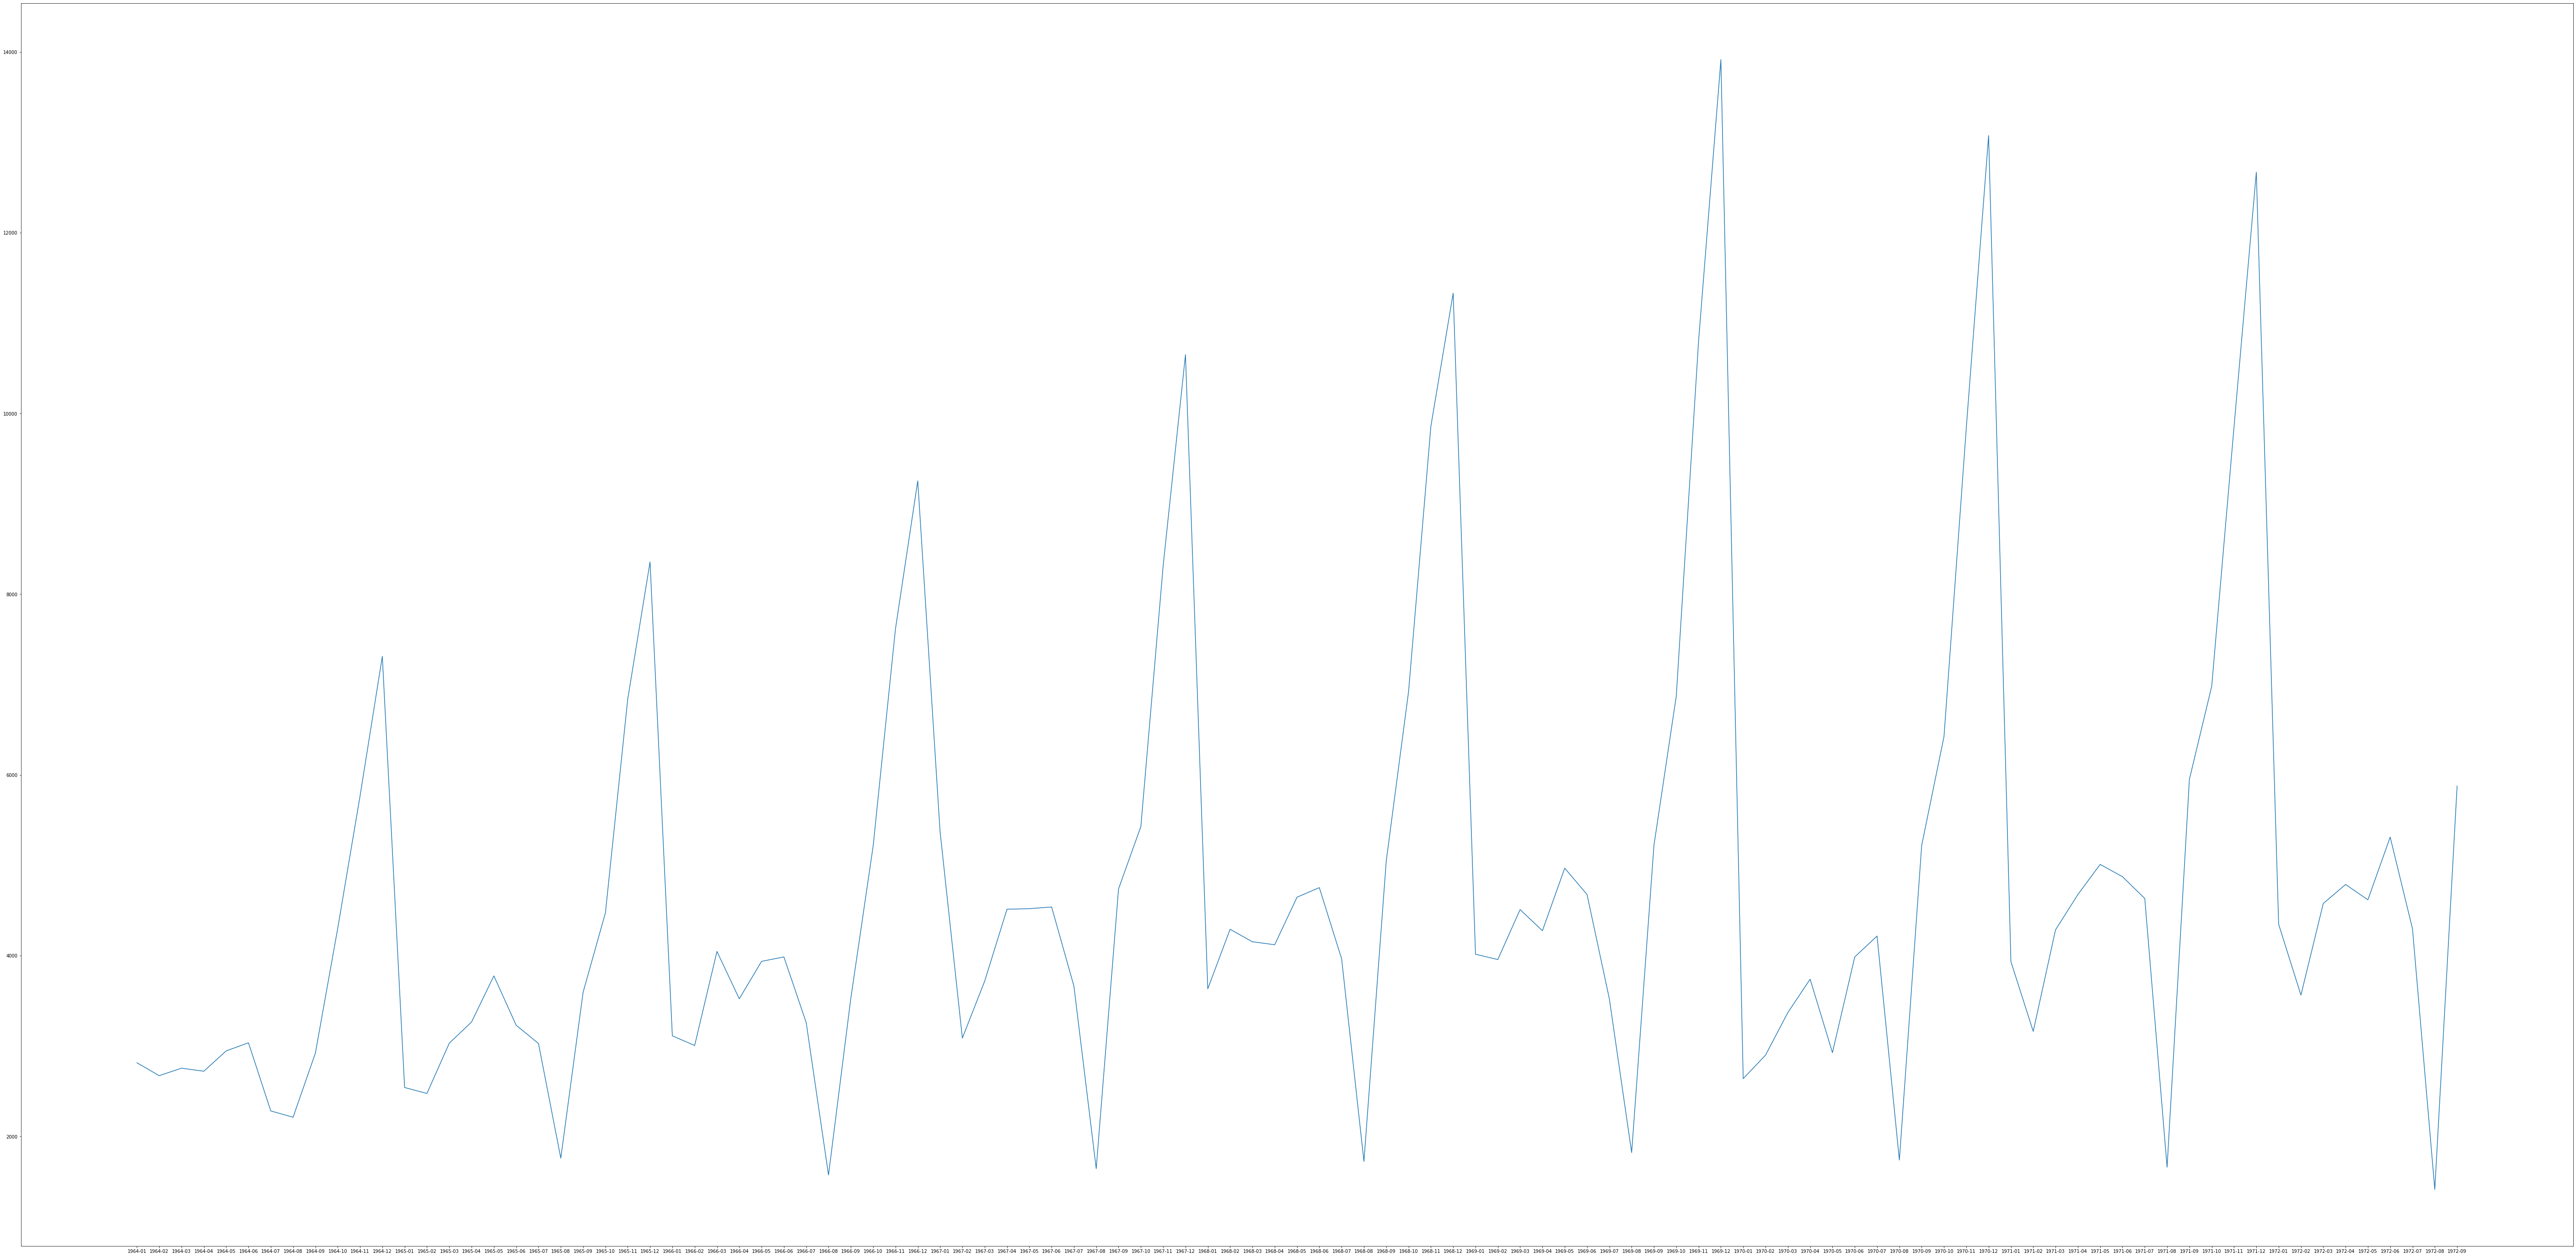

In [130]:
plt.figure(figsize=(100, 50))
plt.plot(df['Month'], df['Perrin Freres monthly champagne sales millions ?64-?72'])
plt.show()

In [131]:
df.shape

(105, 2)

In [132]:
train = df.iloc[:84, [1]].values

In [134]:
train.shape

((84, 1), (21, 1))

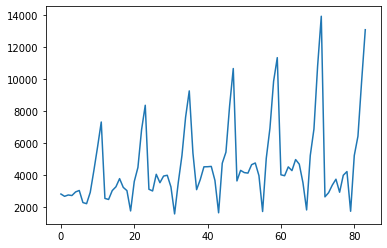

In [135]:
plt.plot(train)
plt.show()

In [136]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
train = scaler.fit_transform(train)

In [137]:
x_train = []
y_train = []

for i in range(12, 84):
    x_train.append(train[i-12:i, 0])
    y_train.append(train[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [138]:
x_train.shape

(72, 12)

In [139]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [140]:
x_train.shape

(72, 12, 1)

In [67]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [68]:
model = Sequential()
model.add(LSTM(units=8, return_sequences= True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(units=8, return_sequences = True))
model.add(LSTM(units=8, return_sequences=True))
model.add(LSTM(units=8, return_sequences = True))
model.add(LSTM(units=8, return_sequences=True))
model.add(LSTM(units=8))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [69]:
h = model.fit(x_train, y_train, epochs=400, batch_size=32)

Train on 72 samples
Epoch 1/400
72/72 [==============================] - 14s 188ms/sample - loss: 0.1160
Epoch 2/400
72/72 [==============================] - 0s 4ms/sample - loss: 0.1067
Epoch 3/400
72/72 [==============================] - 0s 4ms/sample - loss: 0.0971
Epoch 4/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0877
Epoch 5/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0781
Epoch 6/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0691
Epoch 7/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0602
Epoch 8/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0523
Epoch 9/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0467
Epoch 10/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0452
Epoch 11/400
72/72 [==============================] - 0s 4ms/sample - loss: 0.0467
Epoch 12/400
72/72 [==============================] - 0s 3ms/sample - los

72/72 [==============================] - 0s 3ms/sample - loss: 0.0107
Epoch 100/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0096
Epoch 101/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0089
Epoch 102/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0083
Epoch 103/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0078
Epoch 104/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0076
Epoch 105/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0074
Epoch 106/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0073
Epoch 107/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0069
Epoch 108/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0070
Epoch 109/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0064
Epoch 110/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0071
Epoch 

72/72 [==============================] - 0s 2ms/sample - loss: 0.0046
Epoch 197/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0046
Epoch 198/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0046
Epoch 199/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0048
Epoch 200/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0045
Epoch 201/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0045
Epoch 202/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0045
Epoch 203/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0047
Epoch 204/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0046
Epoch 205/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0045
Epoch 206/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0044
Epoch 207/400
72/72 [==============================] - 0s 2ms/sample - loss: 0.0046
Epoch 

72/72 [==============================] - 0s 3ms/sample - loss: 0.0044
Epoch 294/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0041
Epoch 295/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0043
Epoch 296/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0047
Epoch 297/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0045
Epoch 298/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0043
Epoch 299/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0044
Epoch 300/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0046
Epoch 301/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0045
Epoch 302/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0042
Epoch 303/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0040
Epoch 304/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0041
Epoch 

72/72 [==============================] - 0s 3ms/sample - loss: 0.0038
Epoch 391/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0040
Epoch 392/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0037
Epoch 393/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0039
Epoch 394/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0038
Epoch 395/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0039
Epoch 396/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0039
Epoch 397/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0042
Epoch 398/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0038
Epoch 399/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0037
Epoch 400/400
72/72 [==============================] - 0s 3ms/sample - loss: 0.0037


In [69]:
#y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
#y_pred = scaler.inverse_transform(model.predict(x_train))

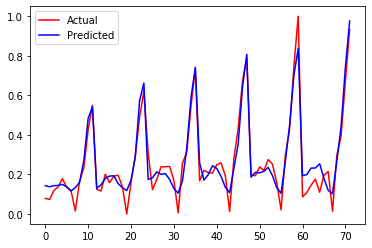

In [70]:
# Visualising the results
plt.plot(y_train, color = 'red', label = 'Actual')
plt.plot(model.predict(x_train), color = 'blue', label = 'Predicted')
plt.legend()
plt.show()

In [145]:
df.shape

(105, 2)

In [154]:
test = df.iloc[84:, [1]].values
inputs = df.iloc[df.shape[0] - test.shape[0] - 12:, [1]].values
inputs = inputs.reshape(-1,1)

In [155]:
inputs

array([[ 2639.],
       [ 2899.],
       [ 3370.],
       [ 3740.],
       [ 2927.],
       [ 3986.],
       [ 4217.],
       [ 1738.],
       [ 5221.],
       [ 6424.],
       [ 9842.],
       [13076.],
       [ 3934.],
       [ 3162.],
       [ 4286.],
       [ 4676.],
       [ 5010.],
       [ 4874.],
       [ 4633.],
       [ 1659.],
       [ 5951.],
       [ 6981.],
       [ 9851.],
       [12670.],
       [ 4348.],
       [ 3564.],
       [ 4577.],
       [ 4788.],
       [ 4618.],
       [ 5312.],
       [ 4298.],
       [ 1413.],
       [ 5877.]])

In [156]:
inputs = scaler.transform(inputs)
X_test = []
for i in range(12, 33):
    X_test.append(inputs[i-12:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)

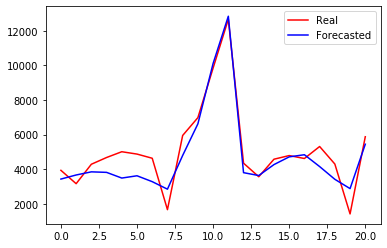

In [158]:
# Visualising the results
plt.plot(test, color = 'red', label = 'Real')
plt.plot(predicted, color = 'blue', label = 'Forecasted')
plt.legend()
plt.show()